# Convolutional Neural Networks

In this notebook, we train a CNN to classify images from the CIFAR-10 database.

In [3]:
!pip install keras

    100% |████████████████████████████████| 327kB 2.2MB/s 


## 1. Load CIFAR-10 Database

In [4]:
import keras
from keras.datasets import cifar10

# load the pre-shuffled train and test data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


Using TensorFlow backend.


170508288/170498071 [==============================] - 19s 0us/step


## 2. Visualize the First 24 Training Images¶

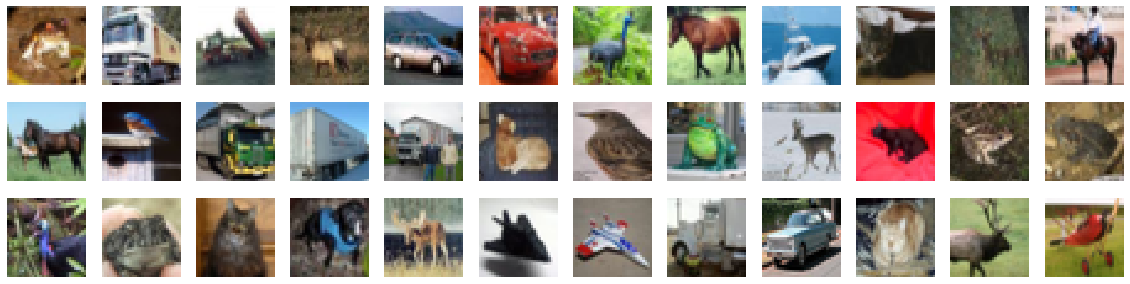

In [5]:
    
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(20,5))
for i in range(36):
  ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
  ax.imshow(np.squeeze(x_train[i]))

## 3. Rescale the Images by Dividing Every Pixel in Every Image by 255

In [0]:
# rescale [0,255] --> [0,1]
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

## 4. Break Dataset into Training, Testing, and Validation Sets

In [7]:
from keras.utils import np_utils

# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

# break training set into training and validation sets
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# print shape of training set
print('x_train shape:', x_train.shape)

# print number of training, validation, and test images
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
print(x_valid.shape[0], 'validation samples')

('x_train shape:', (45000, 32, 32, 3))
(45000, 'train samples')
(10000, 'test samples')
(5000, 'validation samples')


## 5. Define the Model Architecture

Simple Keras CNN Model, Feel free to expand or imporve upon this model :)

In [8]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu', 
                        input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Conv2D(filters=128, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(250, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        416       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 128)         32896     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 4, 4, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 4, 4, 128)         0         
__________

## 6. Compile the Model

In [0]:
# compile the model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', 
                  metrics=['accuracy'])

## 7. Train the Model

In [10]:
from keras.callbacks import ModelCheckpoint   

# Function to later visulaze the accuracy/performance of the model
class AccuracyHistory(keras.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.acc = []

    def on_epoch_end(self, batch, logs={}):
        self.acc.append(logs.get('acc'))

history = AccuracyHistory()

# train the model
checkpointer = ModelCheckpoint(filepath='model.weights.best.hdf5', verbose=1, 
                               save_best_only=True)
hist = model.fit(x_train, y_train, batch_size=32, epochs=100,
          validation_data=(x_valid, y_valid), callbacks=[checkpointer,history], 
          verbose=2, shuffle=True)

Train on 45000 samples, validate on 5000 samples
Epoch 1/100
 - 15s - loss: 1.5541 - acc: 0.4394 - val_loss: 1.2349 - val_acc: 0.5638

Epoch 00001: val_loss improved from inf to 1.23492, saving model to model.weights.best.hdf5
Epoch 2/100
 - 13s - loss: 1.1785 - acc: 0.5826 - val_loss: 1.0582 - val_acc: 0.6264

Epoch 00002: val_loss improved from 1.23492 to 1.05825, saving model to model.weights.best.hdf5
Epoch 3/100
 - 13s - loss: 1.0593 - acc: 0.6303 - val_loss: 1.0191 - val_acc: 0.6496

Epoch 00003: val_loss improved from 1.05825 to 1.01906, saving model to model.weights.best.hdf5
Epoch 4/100
 - 13s - loss: 1.0003 - acc: 0.6538 - val_loss: 1.1279 - val_acc: 0.6332

Epoch 00004: val_loss did not improve
Epoch 5/100
 - 13s - loss: 0.9738 - acc: 0.6668 - val_loss: 1.3372 - val_acc: 0.5658

Epoch 00005: val_loss did not improve
Epoch 6/100
 - 13s - loss: 0.9692 - acc: 0.6722 - val_loss: 0.9778 - val_acc: 0.6584

Epoch 00006: val_loss improved from 1.01906 to 0.97781, saving model to mod

 - 13s - loss: 1.2617 - acc: 0.5904 - val_loss: 1.5512 - val_acc: 0.4650

Epoch 00026: val_loss did not improve
Epoch 27/100
 - 13s - loss: 1.2678 - acc: 0.5858 - val_loss: 1.1325 - val_acc: 0.6418

Epoch 00027: val_loss did not improve
Epoch 28/100
 - 13s - loss: 1.2734 - acc: 0.5843 - val_loss: 1.3519 - val_acc: 0.5484

Epoch 00028: val_loss did not improve
Epoch 29/100
 - 13s - loss: 1.2839 - acc: 0.5782 - val_loss: 1.3162 - val_acc: 0.5336

Epoch 00029: val_loss did not improve
Epoch 30/100
 - 13s - loss: 1.3031 - acc: 0.5742 - val_loss: 1.2363 - val_acc: 0.6088

Epoch 00030: val_loss did not improve
Epoch 31/100
 - 13s - loss: 1.3202 - acc: 0.5694 - val_loss: 2.0647 - val_acc: 0.5920

Epoch 00031: val_loss did not improve
Epoch 32/100
 - 13s - loss: 1.3467 - acc: 0.5616 - val_loss: 1.2368 - val_acc: 0.5796

Epoch 00032: val_loss did not improve
Epoch 33/100
 - 13s - loss: 1.3407 - acc: 0.5577 - val_loss: 1.3651 - val_acc: 0.5578

Epoch 00033: val_loss did not improve
Epoch 34/100



Epoch 00053: val_loss did not improve
Epoch 54/100
 - 13s - loss: 1.5588 - acc: 0.4806 - val_loss: 1.6775 - val_acc: 0.4084

Epoch 00054: val_loss did not improve
Epoch 55/100
 - 13s - loss: 1.5920 - acc: 0.4642 - val_loss: 1.4033 - val_acc: 0.5204

Epoch 00055: val_loss did not improve
Epoch 56/100
 - 13s - loss: 1.6156 - acc: 0.4587 - val_loss: 1.5754 - val_acc: 0.5322

Epoch 00056: val_loss did not improve
Epoch 57/100
 - 13s - loss: 1.6349 - acc: 0.4484 - val_loss: 1.6003 - val_acc: 0.4700

Epoch 00057: val_loss did not improve
Epoch 58/100
 - 13s - loss: 1.6119 - acc: 0.4533 - val_loss: 1.5191 - val_acc: 0.4892

Epoch 00058: val_loss did not improve
Epoch 59/100
 - 13s - loss: 1.6313 - acc: 0.4451 - val_loss: 1.6326 - val_acc: 0.4398

Epoch 00059: val_loss did not improve
Epoch 60/100
 - 13s - loss: 1.6326 - acc: 0.4430 - val_loss: 1.5709 - val_acc: 0.4522

Epoch 00060: val_loss did not improve
Epoch 61/100
 - 13s - loss: 1.6406 - acc: 0.4398 - val_loss: 1.4393 - val_acc: 0.5168



Epoch 00081: val_loss did not improve
Epoch 82/100
 - 13s - loss: 1.8342 - acc: 0.3587 - val_loss: 1.6527 - val_acc: 0.4152

Epoch 00082: val_loss did not improve
Epoch 83/100
 - 13s - loss: 1.8225 - acc: 0.3636 - val_loss: 1.7542 - val_acc: 0.4806

Epoch 00083: val_loss did not improve
Epoch 84/100
 - 13s - loss: 1.8318 - acc: 0.3535 - val_loss: 1.5881 - val_acc: 0.4536

Epoch 00084: val_loss did not improve
Epoch 85/100
 - 13s - loss: 1.8453 - acc: 0.3537 - val_loss: 1.6606 - val_acc: 0.4080

Epoch 00085: val_loss did not improve
Epoch 86/100
 - 13s - loss: 1.8458 - acc: 0.3507 - val_loss: 1.6384 - val_acc: 0.4080

Epoch 00086: val_loss did not improve
Epoch 87/100
 - 13s - loss: 1.8692 - acc: 0.3474 - val_loss: 1.6290 - val_acc: 0.4228

Epoch 00087: val_loss did not improve
Epoch 88/100
 - 13s - loss: 1.8567 - acc: 0.3469 - val_loss: 1.6381 - val_acc: 0.3974

Epoch 00088: val_loss did not improve
Epoch 89/100
 - 13s - loss: 1.8404 - acc: 0.3478 - val_loss: 1.7700 - val_acc: 0.3534


## 8. Load the Model with the Best Validation Accuracy

In [0]:

# load the weights that yielded the best validation accuracy
model.load_weights('model.weights.best.hdf5')

## 9. Calculate Classification Accuracy on Test Set

In [12]:
# evaluate and print test accuracy
score = model.evaluate(x_test, y_test, verbose=0)
print('\n', 'Test accuracy:', score[1])

('\n', 'Test accuracy:', 0.706)


## 10. Visualize Some Predictions

This may give you some insight into why the network is misclassifying certain objects.

In [0]:
# get predictions on the test set
y_hat = model.predict(x_test)

# define text labels (source: https://www.cs.toronto.edu/~kriz/cifar.html)
cifar10_labels = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

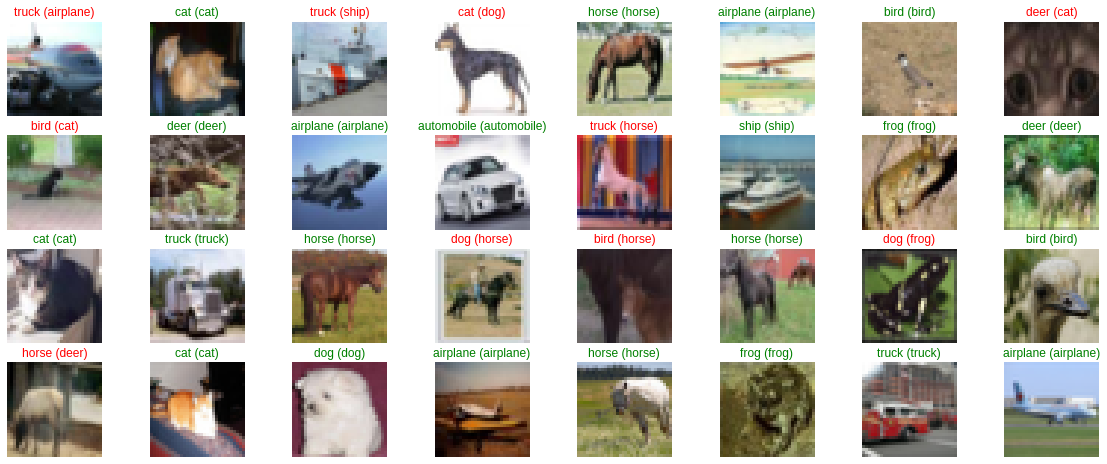

In [14]:
# plot a random sample of test images, their predicted labels, and ground truth
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(np.random.choice(x_test.shape[0], size=32, replace=False)):
    ax = fig.add_subplot(4, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(x_test[idx]))
    pred_idx = np.argmax(y_hat[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title("{} ({})".format(cifar10_labels[pred_idx], cifar10_labels[true_idx]),
                 color=("green" if pred_idx == true_idx else "red"))

## 11. Visulalize the Accuracy of CNN Model

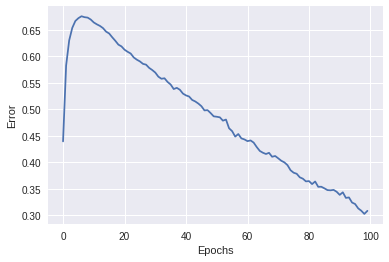

In [34]:
import numpy as np

Error = np.array(history.acc)

plt.plot(range(100), Error)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()
